In [945]:
import os, sys
from IPython.display import Image
import pandas as pd
from __future__ import division
import numpy as np
import rpy2
from rpy2 import robjects as ro
import pandas.rpy.common as com
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import scipy as sp
import traceback
from sklearn import preprocessing
%matplotlib inline
%load_ext rpy2.ipython
pd.set_option('display.width', 100)
pd.set_option('max.columns', 100)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [721]:
data_ai = pd.read_excel("/Users/chris/Downloads/landscape_genetics_data/Genetics_2010/Eckert_Genetics_2010_data.xlsx")

data_gt = pd.read_excel("/Users/chris/Downloads/landscape_genetics_data/Genetics_2010/Eckert_Genetics_2010_data.xlsx", 
                        sheetname="genotyping_data")

data_loc = pd.read_excel("/Users/chris/Downloads/landscape_genetics_data/Genetics_2010/Eckert_Genetics_2010_data.xlsx",
                         sheetname="county_locality")

results = pd.read_excel("/Users/chris/Downloads/landscape_genetics_data/Genetics_2010/Eckert_Genetics_2010_results.xlsx")

In [916]:
data_ai = data_county

In [820]:
trait_name = "sucrose"

In [821]:
pheno = pd.read_excel("/Users/chris/Downloads/Pinus_taeda_metabolite_data.xlsx", 
                      sheetname="metabolite_phenotype_data",
                      header=2)
pheno = pheno[['Longitude', 'Latitude','Clone_id',trait_name]]

pheno.index = pheno.Clone_id
#pheno = pheno.drop('Clone_id', axis=1)
pheno[0:5]

,Longitude,Latitude,Clone_id,sucrose
Clone_id,,,,
105A,-77.05205,35.55349,105A,5.554807
109B,-76.93578,36.39002,109B,5.770389
112C,-77.48749,35.06925,112C,5.611106
118B,-78.29901,36.10041,118B,5.593997
121C,-87.38771,34.14891,121C,5.073928


In [723]:
data_gt[:5]

,county,state,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,...,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig,2080_01,2080_02,2093_01,2093_02,2094_01,2094_02,2123_01,2123_02,2128_01,2128_02,3011_01,3011_02,3013_01,3013_02,3020_01,3020_02,3045_01,3045_02,3052_01,3052_02,3063_01,3063_02,3110_01,3110_02,3118_01,3118_02,3127_01,3127_02,4001_01,4001_02,4003_01,4003_02,4033_01,4033_02,4056_01,4056_02,4058_01,4058_02,4093_01,4093_02,4112_01,4112_02,4137_01,4137_02,4181_01,4181_0
0,CHEROKEE,GA,G/G,A/C,G/G,A/A,G/G,A/G,A/A,G/G,A/C,A/A,A/A,A/A,A/A,A/C,?/?,A/G,G/G,C/C,A/A,A/G,G/G,A/T,C/C,A/G,A/A,A/G,C/C,T/T,A/G,A/A,A/A,G/G,A/A,G/G,A/A,T/T,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/A,C/C,A/A,...,C/C,G/G,C/C,A/G,159,159,337,337,273,281,196,196,253,253,160,160,130,130,198,203,391,393,242,259,245,248,286,286,209,209,177,177,213,223,151,155,131,143,413,413,143,150,307,310,462,462,161,161,365,390
1,BARTOW,GA,A/A,C/C,G/G,A/A,G/G,A/G,A/A,A/G,A/A,G/G,A/A,A/A,A/A,A/C,A/A,G/G,A/G,C/C,A/A,A/A,A/G,A/T,A/C,G/G,A/A,G/G,G/G,T/T,A/A,A/C,A/A,G/G,A/A,C/C,A/A,A/A,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/A,C/C,G/G,...,A/C,A/G,C/C,A/A,165,165,321,353,261,273,196,196,263,263,160,160,130,130,?,?,389,389,239,239,248,248,286,286,209,214,177,177,215,225,155,155,?,?,413,437,137,143,307,307,440,448,161,176,365,365
2,SUSSEX,VA,A/A,C/C,C/C,G/G,G/G,A/G,A/A,G/G,A/A,A/G,A/A,A/A,A/G,A/A,A/A,A/G,G/G,C/C,A/A,A/A,G/G,A/T,A/A,A/G,A/A,G/G,C/G,T/T,A/A,A/A,A/A,G/G,A/T,G/G,?/?,T/T,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,G/G,C/C,A/A,...,A/C,G/G,C/C,G/G,153,153,335,352,261,273,196,196,244,244,160,160,130,130,?,?,391,391,239,239,263,269,286,286,200,206,177,177,219,225,148,155,133,133,413,413,150,152,322,325,462,462,161,169,378,395
3,KING & QUEEN,VA,A/A,A/A,C/C,G/G,A/G,G/G,A/A,G/G,A/A,A/G,A/A,A/A,A/A,C/C,A/A,A/G,G/G,C/C,A/A,A/G,G/G,A/A,A/C,G/G,A/A,G/G,C/G,T/T,A/G,A/C,A/A,A/G,?/?,G/G,A/A,A/T,C/C,C/C,A/A,G/G,A/A,A/G,A/A,A/A,A/A,G/G,C/C,A/G,...,A/C,A/G,C/C,G/G,138,153,354,354,273,273,188,196,244,261,160,160,130,130,193,209,389,391,242,259,254,263,289,289,206,206,177,177,215,226,151,155,133,152,413,413,146,154,307,325,460,462,163,190,390,417
4,KING & QUEEN,VA,A/A,A/C,C/C,?/?,G/G,A/G,A/A,G/G,A/A,A/A,A/A,A/A,?/?,A/C,?/?,G/G,A/A,C/C,A/A,A/A,G/G,A/A,C/C,?/?,A/A,G/G,C/G,T/T,A/G,A/C,A/A,G/G,A/T,G/G,?/?,T/T,C/C,A/A,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/G,C/C,A/G,...,A/C,G/G,A/C,G/G,138,159,347,353,261,261,196,196,241,244,160,185,130,130,?,?,391,393,239,259,254,254,292,292,209,209,177,180,217,226,155,155,?,?,413,431,143,146,310,322,462,462,169,169,395,409


In [724]:
results.index = results.locus
results = results.drop("locus", axis=1)

In [725]:
results[0:5]

,AI_Q1,AI_Q2,AI_Q3,AI_Q4,AI_Q1_p,AI_Q2_p,AI_Q3_p,AI_Q4_p,AI_Q1_q,AI_Q2_q,AI_Q3_q,AI_Q4_q
locus,,,,,,,,,,,,
0-10037-01-257,3.090870,1.864283,0.149907,2.461218,0.078733,0.172131,0.698625,0.116688,0.747412,0.810414,0.921038,0.780214
0-10040-02-394,0.222454,0.278099,0.022114,0.017258,0.637176,0.597950,0.881783,0.895482,0.915915,0.913184,0.930757,0.931667
0-10044-01-392,0.089144,0.223369,0.555988,0.021623,0.765268,0.636485,0.455881,0.883096,0.924059,0.915847,0.892786,0.930859
0-10048-01-60,1.414864,0.015237,1.090495,0.137387,0.234251,0.901761,0.296362,0.710892,0.831868,0.932005,0.860061,0.922234
0-10051-02-166,0.058918,0.040176,0.027423,0.001222,0.808214,0.841136,0.868472,0.972119,0.925925,0.927279,0.928358,0.937372


In [729]:
genotypes = data_gt.ix[:,[x for x in data_gt.columns if '-' in x]]

In [730]:
genotypes[:5]

,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,0-10618-01-108,0-10631-01-367,...,UMN-822-01-99,UMN-828-01-73,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,G/G,A/C,G/G,A/A,G/G,A/G,A/A,G/G,A/C,A/A,A/A,A/A,A/A,A/C,?/?,A/G,G/G,C/C,A/A,A/G,G/G,A/T,C/C,A/G,A/A,A/G,C/C,T/T,A/G,A/A,A/A,G/G,A/A,G/G,A/A,T/T,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/A,C/C,A/A,A/A,A/A,...,A/G,G/G,G/G,A/G,A/A,G/G,A/G,A/G,G/G,?/?,A/A,A/A,C/C,A/A,A/A,C/C,A/A,A/G,?/?,G/G,A/C,G/G,C/C,G/G,C/G,G/G,A/A,A/A,A/G,C/C,A/G,?/?,A/A,A/C,A/A,A/A,T/T,C/C,A/C,A/G,A/A,C/G,A/A,?/?,G/G,A/A,C/C,G/G,C/C,A/G
1,A/A,C/C,G/G,A/A,G/G,A/G,A/A,A/G,A/A,G/G,A/A,A/A,A/A,A/C,A/A,G/G,A/G,C/C,A/A,A/A,A/G,A/T,A/C,G/G,A/A,G/G,G/G,T/T,A/A,A/C,A/A,G/G,A/A,C/C,A/A,A/A,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/A,C/C,G/G,A/A,A/A,...,G/G,G/G,G/G,A/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/G,A/C,A/A,A/A,C/C,A/C,A/A,A/G,G/G,A/C,G/G,C/C,A/A,G/G,G/G,?/?,A/A,A/G,?/?,A/G,G/G,A/A,C/C,A/A,A/A,T/T,C/C,C/C,G/G,A/A,G/G,A/A,A/A,G/G,A/A,A/C,A/G,C/C,A/A
2,A/A,C/C,C/C,G/G,G/G,A/G,A/A,G/G,A/A,A/G,A/A,A/A,A/G,A/A,A/A,A/G,G/G,C/C,A/A,A/A,G/G,A/T,A/A,A/G,A/A,G/G,C/G,T/T,A/A,A/A,A/A,G/G,A/T,G/G,?/?,T/T,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,G/G,C/C,A/A,A/A,A/A,...,G/G,?/?,G/G,G/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/G,C/C,A/A,A/A,A/C,A/A,A/G,A/G,G/G,A/A,G/G,?/?,A/G,G/G,G/G,A/G,A/A,G/G,?/?,?/?,A/G,A/G,C/C,A/A,A/A,T/T,C/G,C/C,G/G,A/A,G/G,A/A,A/A,G/G,A/A,A/C,G/G,C/C,G/G
3,A/A,A/A,C/C,G/G,A/G,G/G,A/A,G/G,A/A,A/G,A/A,A/A,A/A,C/C,A/A,A/G,G/G,C/C,A/A,A/G,G/G,A/A,A/C,G/G,A/A,G/G,C/G,T/T,A/G,A/C,A/A,A/G,?/?,G/G,A/A,A/T,C/C,C/C,A/A,G/G,A/A,A/G,A/A,A/A,A/A,G/G,C/C,A/G,A/G,A/C,...,A/A,G/G,A/G,G/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/G,A/C,A/A,A/T,A/C,?/?,A/A,?/?,G/G,A/C,C/G,C/C,A/A,C/G,G/G,A/G,A/A,A/G,C/C,G/G,G/G,A/G,C/C,A/A,A/A,T/T,C/C,C/C,G/G,A/A,C/G,A/A,?/?,A/G,A/A,A/C,A/G,C/C,G/G
4,A/A,A/C,C/C,?/?,G/G,A/G,A/A,G/G,A/A,A/A,A/A,A/A,?/?,A/C,?/?,G/G,A/A,C/C,A/A,A/A,G/G,A/A,C/C,?/?,A/A,G/G,C/G,T/T,A/G,A/C,A/A,G/G,A/T,G/G,?/?,T/T,C/C,A/A,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/G,C/C,A/G,A/A,A/A,...,A/G,G/G,G/G,G/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/A,C/C,A/A,A/A,C/C,A/A,A/G,A/A,G/G,A/A,C/G,A/C,G/G,C/C,G/G,G/G,A/G,A/G,C/C,A/G,A/G,G/G,A/C,A/T,A/A,T/T,C/G,C/C,G/G,A/A,C/G,A/A,C/C,A/G,A/A,A/C,G/G,A/C,G/G


In [731]:
def is_homozygous(gt):
    if len(set([x.strip() for x in gt.split("/")])) == 1:
        return True
    return False

def get_allele_counts(counts):
    a = {}
    het = 0
    for gt in counts.index:
        for allele in [x.strip() for x in gt.split("/")]:
            if not allele in a:
                a[allele] = 0
            a[allele] += counts[gt]
        if not is_homozygous(gt):
            het += counts[gt]
    return sorted(a.items(), key=lambda x: x[1], reverse=True), het

def get_correction(n):
    #for finite sample size
    return (2*n)/(2*n-1)

def get_allele_freqs(locus):
    locus = locus[locus != '?/?']
    locus = locus[locus != 'NA']
    c = locus.value_counts()
    c = c.sort(inplace=False, ascending=False)
    allele_counts = get_allele_counts(c)
    total_alleles = 2.0*sum(c)
    num_individuals = sum(c)
    A = ""
    a = ""
    P = 0
    Q = 0
    if len(allele_counts[0]) == 2:
        A = allele_counts[0][0][0]
        a = allele_counts[0][1][0]
        P = allele_counts[0][0][1]
        Q = allele_counts[0][1][1]
    else:
        A = allele_counts[0][0][0]
        P = P = allele_counts[0][0][1]
    PQ = allele_counts[-1]
    p = P/total_alleles
    q = Q/total_alleles
    assert p + q == 1.0
    He = 2 * p * q * get_correction(num_individuals)
    Ho = PQ*1.0/num_individuals
    Fis = 1 - (Ho/He)
    #print p, q, He, Ho, Fis
    ret = pd.Series({"p":p, 
                      "q":q,
                      "P":P,
                      "Q":Q,
                      "He":He,
                      "Ho":Ho, 
                      "Fis":Fis,
                    "PQ": PQ,
                    "total_alleles":total_alleles,
                    "num_indiv":num_individuals,
                    "A":A,
                    "a":a})
    return ret
#genotypes.ix[:,0:2].apply(get_allele_freqs)

In [732]:
af = genotypes.apply(get_allele_freqs)

In [733]:
af

,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,0-10618-01-108,0-10631-01-367,...,UMN-822-01-99,UMN-828-01-73,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
A,A,C,C,G,G,G,A,G,A,A,A,A,A,A,A,G,G,C,A,A,G,A,A,G,A,G,G,T,A,A,A,G,A,G,A,T,C,A,A,G,A,G,A,A,A,A,C,G,A,A,...,G,G,G,G,A,G,G,A,G,G,A,G,C,A,A,C,A,A,G,G,A,G,C,A,G,G,A,A,A,C,G,G,A,C,A,A,T,C,C,G,A,G,A,C,G,A,C,G,C,G
Fis,-0.03216907,0.02119724,0.09921339,0.1181548,0.03167254,0.05276604,0.04186125,0.003752806,-0.03022426,-0.05247644,0.04418605,0.1390307,0.01549163,0.08842149,0.1309751,0.03455285,-0.04801829,0.1258222,0.1611171,0.040677,-0.01798622,-0.009284093,0.04767918,-0.07147174,-0.06166861,-0.02021976,0.002909117,-0.02020371,0.0632208,-0.1397407,0.05416169,-0.00614982,0.1358501,-0.03961246,-0.02098361,-0.02510473,-0.1080972,0.01746325,-0.007317073,0.05539775,0.0320707,-0.01955869,-0.03556308,0.03142365,0.06132706,-0.05856643,0.002094025,0.03944087,0.05219598,-0.02674489,...,0.053314,0.004961839,-0.07167508,-0.00125761,0.1233961,0.1453083,-0.03819444,0.01885451,0.07017544,0.00185707,0.0549236,-0.05171116,-0.04404281,-0.08000449,0.04985337,0.01701113,0.04904858,0.00607703,-0.105989,0.008843729,0.1258028,-0.01565513,-0.02007194,-0.0324475,0.04177898,0.02805509,0.03121406,-0.03989813,-0.001953125,0.006665596,0.02262731,0.01033714,-0.08814598,0.05977716,0.04662639,0.08527132,0.0348086,-0.0378386,0.02560702,0.05450124,0.0450352,-0.08856421,-0.007317073,-0.03225219,0.06810505,-0.01142857,0.009112455,0.04806096,-0.0906287,0.01791584
He,0.4090983,0.4999238,0.5004262,0.450996,0.1261452,0.5003425,0.0779379,0.07471404,0.1083749,0.4411364,0.04747877,0.1645748,0.09610547,0.4252208,0.1117601,0.321044,0.3975758,0.4730263,0.1871035,0.1197581,0.1239836,0.3367429,0.4925569,0.2937587,0.1674854,0.1472647,0.4963068,0.3012311,0.4790675,0.3368828,0.04276955,0.2400776,0.4972735,0.3777747,0.2472863,0.4203417,0.2176116,0.4429513,0.01601187,0.06989455,0.2599605,0.2072607,0.06784853,0.1072668,0.107926,0.4988377,0.07608825,0.4865086,0.07217094,0.1048627,...,0.4256538,0.2308977,0.3231777,0.3421926,0.0239967,0.109807,0.1433906,0.3032792,0.03702444,0.3038977,0.09230733,0.4981291,0.4269209,0.1661524,0.3600552,0.3834869,0.3845057,0.3190912,0.476427,0.07077271,0.3375462,0.2344253,0.3591282,0.5002166,0.465503,0.05651277,0.4690352,0.1819729,0.4990253,0.1042004,0.4580775,0.3931485,0.487067,0.1967009,0

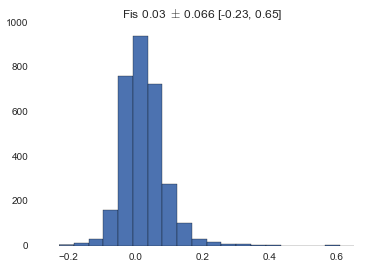

In [734]:
def plot_hist(df, index):
    d = df.ix[index,:]
    plt.hist(d, bins=20)
    plt.title("%s %.2f $\pm$ %.3f [%.2f, %.2f]" % (index, 
                                                   np.mean(d), 
                                                   np.std(d),
                                                  np.min(d),
                                                  np.max(d)))
    plt.show()
plot_hist(af, "Fis")

In [735]:
def convert_to_z12(locus):
    freq = af[locus.name]
    trans = {"%s/%s" % (freq["A"],freq["A"]): 0,
            "%s/%s" % (freq["a"],freq["a"]): 2,
            "%s/%s" % (freq["A"],freq["a"]): 1,
            "%s/%s" % (freq["a"],freq["A"]): 1,
            "?/?":-1}
    return locus.apply(lambda x: trans[x])
z12 = genotypes.apply(convert_to_z12)

In [736]:
def center_and_standardize_value(val, u, var):
    if val == -1:
        return 0.0
    return (val-u)/np.sqrt(var)

def center_and_standardize(snp):
    maf = mafs[snp.name]
    u = np.mean([x for x in snp if x != -1])
    var = np.sqrt(maf*(1-maf))
    return snp.apply(center_and_standardize_value, args=(u, var))

In [737]:
pca_std = z12.apply(center_and_standardize)
pca_std.apply(np.mean)

0-10037-01-257    3.855437e-17
0-10040-02-394   -1.713527e-17
0-10044-01-392    1.285146e-16
0-10048-01-60     4.283819e-17
0-10051-02-166    1.427940e-17
0-10054-01-402   -1.427940e-17
0-10067-03-111   -5.711758e-18
0-10079-02-168    5.140582e-17
0-10112-01-169    2.998673e-17
0-10113-01-119   -8.567637e-17
0-10116-01-165   -7.139698e-18
0-10151-01-86     5.140582e-17
0-10162-01-255    3.569849e-18
0-10207-01-280   -6.282934e-17
0-10210-01-41     0.000000e+00
...
UMN-CL299Contig1-01-46     1.142352e-17
UMN-CL306Contig1-04-261   -8.567637e-18
UMN-CL307Contig1-04-143    3.712643e-17
UMN-CL319Contig1-03-131    1.999115e-17
UMN-CL326Contig1-05-421   -4.569407e-17
UMN-CL339Contig1-05-39    -1.713527e-17
UMN-CL34Contig1-03-89     -9.709989e-17
UMN-CL353Contig1-04-64     1.320844e-17
UMN-CL362Contig1-07-133    3.141467e-17
UMN-CL363Contig1-01-233   -3.284261e-17
UMN-CL379Contig1-12-117   -1.142352e-17
UMN-CL424Contig1-03-94    -5.140582e-17
UMN-CL54Contig1-07-88     -5.426170e-17
UMN-CL91Con

In [738]:
r = ro.r

In [739]:
prcomp = r('prcomp')
summary = r('summary')

In [740]:
prcomp_res = prcomp(pca_std, scale=False, center=False)

In [742]:
print summary(prcomp_res)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     6.07193 4.20751 3.79014 3.20076 3.08532 3.04595 2.96424
Proportion of Variance 0.01789 0.00859 0.00697 0.00497 0.00462 0.00450 0.00426
Cumulative Proportion  0.01789 0.02649 0.03346 0.03843 0.04305 0.04755 0.05182
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.93988 2.89841 2.88317 2.83414 2.82524 2.80280 2.79039
Proportion of Variance 0.00419 0.00408 0.00403 0.00390 0.00387 0.00381 0.00378
Cumulative Proportion  0.05601 0.06009 0.06412 0.06802 0.07190 0.07571 0.07949
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     2.75606 2.74385 2.73991 2.72647 2.71721 2.70782 2.6857
Proportion of Variance 0.00369 0.00365 0.00364 0.00361 0.00358 0.00356 0.0035
Cumulative Proportion  0.08317 0.08683 0.09047 0.09408 0.09766 0.10122 0.1047
                          PC22

In [743]:
x = com.convert_robj(prcomp_res.rx2("x"))
x.index = pca_std.index
x.ix[0:5,0:5]

,PC1,PC2,PC3,PC4,PC5
0,-4.227659,-0.930500,1.853226,-2.682931,0.923642
1,0.888892,-0.179881,-8.694134,-2.872412,-3.320970
2,-3.319852,2.300243,1.670677,-9.666361,-9.595642
3,-5.508931,-1.505746,5.299569,5.727700,-4.449550
4,-6.334801,-0.261818,6.637892,5.268738,0.579049
5,-3.629128,-0.334265,2.039921,-3.229526,-1.352967


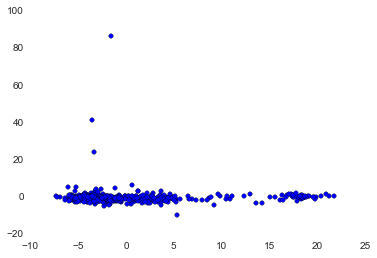

In [744]:
plt.scatter(x.PC1, x.PC2)
plt.show()

In [748]:
%%R
source("../tw_calc.R")
test=read.table("../twtable", header=F)

In [749]:
TWcalc = r('TWcalc')

In [750]:
tw = TWcalc(com.convert_to_r_matrix(pca_std), 25)

In [751]:
tw_p = com.convert_robj(tw.rx2(2))
tw_e = com.convert_robj(tw.rx2(1))

In [752]:
tw_num = 0
for i, p in enumerate(tw_p):
    print i, p
    if p > 0.05:
        tw_num = i
        break
print "Tracy-Widom test yields %d axes of pop structure" % tw_num

0 8e-09
1 8e-09
2 8e-09
3 8e-09
4 8e-09
5 8e-09
6 8e-09
7 8e-09
8 8e-09
9 8e-09
10 8e-09
11 8e-09
12 8e-09
13 8e-09
14 2.2872e-05
15 0.000220344
16 0.000177359
17 0.00206759
18 0.006211384
19 0.01992964
20 0.328982392
Tracy-Widom test yields 20 axes of pop structure


In [754]:
y = pd.DataFrame(x)
for col in y.columns[0:10]:
    print col
    s_cutoff = np.std(y[col])*6
    u = np.mean(y[col])
    cutoff = sorted([u+s_cutoff, u-s_cutoff], reverse=True)
    #print u, cutoff
    outliers = y[col][(y[col] > cutoff[0]) | (y[col] < cutoff[1])]
    y = y.drop(outliers.index)

PC1
PC2
PC3
PC4
PC5
PC6
PC7
PC8
PC9
PC10


In [755]:
gt_drop = genotypes.ix[y.index,:]

In [756]:
gt_drop[0:10]

,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,0-10618-01-108,0-10631-01-367,...,UMN-822-01-99,UMN-828-01-73,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,G/G,A/C,G/G,A/A,G/G,A/G,A/A,G/G,A/C,A/A,A/A,A/A,A/A,A/C,?/?,A/G,G/G,C/C,A/A,A/G,G/G,A/T,C/C,A/G,A/A,A/G,C/C,T/T,A/G,A/A,A/A,G/G,A/A,G/G,A/A,T/T,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/A,C/C,A/A,A/A,A/A,...,A/G,G/G,G/G,A/G,A/A,G/G,A/G,A/G,G/G,?/?,A/A,A/A,C/C,A/A,A/A,C/C,A/A,A/G,?/?,G/G,A/C,G/G,C/C,G/G,C/G,G/G,A/A,A/A,A/G,C/C,A/G,?/?,A/A,A/C,A/A,A/A,T/T,C/C,A/C,A/G,A/A,C/G,A/A,?/?,G/G,A/A,C/C,G/G,C/C,A/G
1,A/A,C/C,G/G,A/A,G/G,A/G,A/A,A/G,A/A,G/G,A/A,A/A,A/A,A/C,A/A,G/G,A/G,C/C,A/A,A/A,A/G,A/T,A/C,G/G,A/A,G/G,G/G,T/T,A/A,A/C,A/A,G/G,A/A,C/C,A/A,A/A,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/A,C/C,G/G,A/A,A/A,...,G/G,G/G,G/G,A/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/G,A/C,A/A,A/A,C/C,A/C,A/A,A/G,G/G,A/C,G/G,C/C,A/A,G/G,G/G,?/?,A/A,A/G,?/?,A/G,G/G,A/A,C/C,A/A,A/A,T/T,C/C,C/C,G/G,A/A,G/G,A/A,A/A,G/G,A/A,A/C,A/G,C/C,A/A
3,A/A,A/A,C/C,G/G,A/G,G/G,A/A,G/G,A/A,A/G,A/A,A/A,A/A,C/C,A/A,A/G,G/G,C/C,A/A,A/G,G/G,A/A,A/C,G/G,A/A,G/G,C/G,T/T,A/G,A/C,A/A,A/G,?/?,G/G,A/A,A/T,C/C,C/C,A/A,G/G,A/A,A/G,A/A,A/A,A/A,G/G,C/C,A/G,A/G,A/C,...,A/A,G/G,A/G,G/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/G,A/C,A/A,A/T,A/C,?/?,A/A,?/?,G/G,A/C,C/G,C/C,A/A,C/G,G/G,A/G,A/A,A/G,C/C,G/G,G/G,A/G,C/C,A/A,A/A,T/T,C/C,C/C,G/G,A/A,C/G,A/A,?/?,A/G,A/A,A/C,A/G,C/C,G/G
4,A/A,A/C,C/C,?/?,G/G,A/G,A/A,G/G,A/A,A/A,A/A,A/A,?/?,A/C,?/?,G/G,A/A,C/C,A/A,A/A,G/G,A/A,C/C,?/?,A/A,G/G,C/G,T/T,A/G,A/C,A/A,G/G,A/T,G/G,?/?,T/T,C/C,A/A,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/G,C/C,A/G,A/A,A/A,...,A/G,G/G,G/G,G/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/A,C/C,A/A,A/A,C/C,A/A,A/G,A/A,G/G,A/A,C/G,A/C,G/G,C/C,G/G,G/G,A/G,A/G,C/C,A/G,A/G,G/G,A/C,A/T,A/A,T/T,C/G,C/C,G/G,A/A,C/G,A/A,C/C,A/G,A/A,A/C,G/G,A/C,G/G
5,A/G,C/C,C/G,A/A,G/G,A/G,A/A,G/G,A/A,A/G,A/A,A/A,A/A,C/C,A/A,G/G,A/G,C/C,A/A,A/A,G/G,A/T,A/C,G/G,A/A,G/G,G/G,T/T,A/A,A/C,A/A,A/G,A/T,C/C,A/A,A/A,A/C,A/C,A/A,G/G,A/A,A/G,A/A,A/A,A/A,A/G,C/C,A/A,A/A,A/A,...,A/G,G/G,G/G,G/G,A/A,G/G,G/G,A/A,G/G,G/G,A/A,A/G,A/C,A/A,A/A,C/C,A/A,G/G,G/G,G/G,A/C,C/G,A/C,A/G,G/G,G/G,A/G,A/A,A/A,C/C,G/G,?/?,A/G,C/C,A/A,A/A,T/T,C/G,C/C,A/G,A/A,C/G,A/A,?/?,A/G,A/A,A/C,G/G,A/C,A/G
6,A/A,A/A,G/G,A/G,G/G,A/G,A/A,G/G,A/A,A/A,A/A,A/A,A/A,A/A,A/A,A/G,A/G,C/C,A/A,A/A,G/G,A/T,A/C,G/G,A/A,G/G,C/G,A/T,G/G,A/C,A/A,G/G,?/?,C/G,A/A,T/T,A/C,?/?,A/A,G/G,A/

In [757]:
z12_drop = gt_drop.apply(convert_to_z12)
z12_drop[0:5]

,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,0-10618-01-108,0-10631-01-367,...,UMN-822-01-99,UMN-828-01-73,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,2,1,2,2,0,1,0,0,1,0,0,0,0,1,-1,1,0,0,0,1,0,1,2,1,0,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,...,1,0,0,1,0,0,1,1,0,-1,0,2,0,0,0,0,0,1,-1,0,1,0,0,2,1,0,0,0,1,0,1,-1,0,1,0,0,0,0,1,1,0,1,0,-1,0,0,0,0,0,1
1,0,0,2,2,0,1,0,1,0,2,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,-1,0,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,2
3,0,2,0,0,1,0,0,0,0,1,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,-1,0,0,1,0,2,0,0,0,1,0,0,0,2,0,1,1,1,...,2,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,-1,0,-1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,-1,1,0,1,1,0,0
4,0,1,0,-1,0,1,0,0,0,0,0,0,-1,1,-1,0,2,0,0,0,0,0,2,-1,0,0,1,0,1,1,0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,1,1,2,2,0,2,1,1,0,1,1,2,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
5,1,0,1,2,0,1,0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,2,0,2,1,1,0,0,0,1,0,0,0,1,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,1,1,1,1,0,0,1,0,0,0,0,-1,1,0,0,0,0,1,0,1,0,1,0,-1,1,0,1,0,1,1


In [758]:
pca_drop_std = z12_drop.apply(center_and_standardize)

In [759]:
pca_drop_std[0:10]

,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,0-10618-01-108,0-10631-01-367,...,UMN-822-01-99,UMN-828-01-73,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,2.107587,0.047548,1.421714,1.890773,-0.266114,0.011785,-0.179495,-0.173554,1.829378,-0.950368,-0.126562,-0.327354,-0.210419,0.569546,0.00000,0.960239,-0.816592,-1.107185,-0.359906,1.757484,-0.259288,0.897101,1.592008,1.033803,-0.347651,1.615411,1.546197,-0.599401,0.290223,-0.675369,-0.112776,-0.482145,-1.295336,-0.749608,-0.486394,-0.885841,-0.43142,0.490961,-0.049742,-0.163875,-0.514678,-0.412137,-0.159788,-0.238222,-0.23985,-1.331511,-0.179681,1.667541,-0.175939,-0.219839,...,0.573641,-0.452928,-0.640473,0.880484,-0.060042,-0.236048,1.641224,1.002764,-0.095543,0.000000,-0.214009,1.513887,-0.915050,-0.342125,-0.728983,-0.771956,-0.788093,0.965822,0.000000,-0.165547,0.891713,-0.469080,-0.726866,1.445253,0.373071,-0.133286,-1.081022,-0.371538,0.066710,-0.228256,0.427226,0.000000,-1.178406,1.390486,-0.328408,-0.141186,-0.388627,-0.560743,1.165155,1.034360,-0.2251,0.740705,-0.044142,0.000000,-0.277861,-0.064989,-0.779494,-0.904873,-0.472712,0.877175
1,-0.866951,-1.367010,1.421714,1.890773,-0.266114,0.011785,-0.179495,2.101516,-0.243688,1.968620,-0.126562,-0.327354,-0.210419,0.569546,-0.22353,-0.619935,0.681344,-1.107185,-0.359906,-0.264460,1.745204,0.897101,0.172176,-0.581853,-0.347651,-0.304675,-1.288084,-0.599401,-1.139483,0.885910,-0.112776,-0.482145,-1.295336,2.284764,-0.486394,2.068599,-0.43142,0.490961,-0.049742,-0.163875,-0.514678,-0.412137,-0.159788,-0.238222,-0.23985,-1.331511,-0.179681,-1.180876,-0.175939,-0.219839,...,-0.898952,-0.452928,-0.640473,0.880484,-0.060042,-0.236048,-0.291702,-0.600058,-0.095543,-0.595971,-0.214009,0.098056,0.556449,-0.342125,-0.728983,-0.771956,0.722419,-0.616761,0.311247,-0.165547,0.891713,-0.469080,-0.726866,-1.383450,-1.066935,-0.133286,0.000000,-0.371538,0.066710,0.000000,0.427226,-0.802594,-1.178406,-0.395569,-0.328408,-0.141186,-0.388627,-0.560743,-0.506106,-0.580452,-0.2251,-0.774024,-0.044142,2.041739,-0.277861,-0.064989,0.729526,0.567087,-0.472712,2.434228
3,-0.866951,1.462106,-1.406722,-1.012134,1.729738,-1.402474,-0.179495,-0.173554,-0.243688,0.509126,-0.126562,-0.327354,-0.210419,2.042511,-0.22353,0.960239,-0.816592,-1.107185,-0.359906,1.757484,-0.259288,-0.664326,0.172176,-0.581853,-0.347651,-0.304675,0.12

In [760]:
pca_drop_std.describe().ix[:,0:5]

,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166
count,6.070000e+02,6.070000e+02,6.070000e+02,6.070000e+02,6.070000e+02
mean,5.852906e-17,-1.755872e-17,4.682324e-17,-4.389679e-18,8.779358e-18
std,9.303810e-01,9.941637e-01,1.009829e+00,1.021606e+00,7.036968e-01
min,-8.669507e-01,-1.367010e+00,-1.406722e+00,-1.012134e+00,-2.661136e-01
25%,-8.669507e-01,-1.367010e+00,-1.406722e+00,-1.012134e+00,-2.661136e-01
50%,0.000000e+00,4.754816e-02,7.495854e-03,4.393196e-01,-2.661136e-01
75%,6.203181e-01,4.754816e-02,1.421714e+00,4.393196e-01,-2.661136e-01
max,2.107587e+00,1.462106e+00,1.421714e+00,1.890773e+00,3.725590e+00


In [761]:
prcomp_res_drop = prcomp(pca_drop_std, scale=False, center=False)

In [762]:
x_drop = com.convert_robj(prcomp_res_drop.rx2("x"))
x_drop.index = pca_drop_std.index
x_drop.ix[0:5,0:5]

,PC1,PC2,PC3,PC4,PC5
0,-4.333631,1.477887,2.473628,-2.610228,3.732781
1,0.972361,-8.577780,2.513130,8.103148,2.426614
3,-5.587363,4.702591,-5.712560,1.822264,-5.001879
4,-6.356667,6.632884,-6.070111,-0.607114,4.199792
5,-3.653699,2.052517,5.030496,2.775605,6.097295


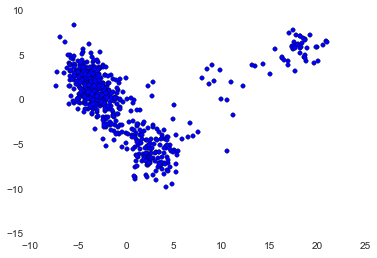

In [763]:
plt.scatter(x_drop.PC1, x_drop.PC2)
plt.show()

In [764]:
print summary(prcomp_res_drop)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     6.04309 3.80099 3.14407 2.95914 2.89047 2.85444 2.82015
Proportion of Variance 0.01799 0.00712 0.00487 0.00431 0.00412 0.00401 0.00392
Cumulative Proportion  0.01799 0.02511 0.02998 0.03430 0.03841 0.04243 0.04635
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     2.80660 2.79209 2.78734 2.77330 2.76292 2.74726 2.73089
Proportion of Variance 0.00388 0.00384 0.00383 0.00379 0.00376 0.00372 0.00367
Cumulative Proportion  0.05023 0.05407 0.05790 0.06169 0.06545 0.06917 0.07284
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.70648 2.70016 2.69946 2.69158 2.68432 2.68015 2.66814
Proportion of Variance 0.00361 0.00359 0.00359 0.00357 0.00355 0.00354 0.00351
Cumulative Proportion  0.07645 0.08004 0.08364 0.08720 0.09076 0.09429 0.09780
                         P

In [765]:
tw = TWcalc(com.convert_to_r_matrix(pca_drop_std), 25)

In [766]:
tw_p = com.convert_robj(tw.rx2(2))
tw_e = com.convert_robj(tw.rx2(1))

In [767]:
tw_num = 0
for i, p in enumerate(tw_p):
    print i, p
    if p > 0.05:
        tw_num = i
        break
print "Tracy-Widom test yields %d axes of pop structure" % tw_num

0 8e-09
1 8e-09
2 8e-09
3 8e-09
4 8e-09
5 8e-09
6 8e-09
7 5.9e-08
8 1.501e-06
9 1.501e-06
10 2.8955e-05
11 0.000177359
12 0.003013114
13 0.042180992
14 0.573774198
Tracy-Widom test yields 14 axes of pop structure


In [768]:
hierf_trans = {0:11, 1:12, 2:22, -1:'NA'}

In [769]:
def apply_hierf_trans(series):
    return [hierf_trans[x] if x in hierf_trans else x for x in series]

In [770]:
hierf_df = z12_drop.apply(apply_hierf_trans)

In [771]:
hierf_df.insert(0, "countyid", None)
hierf_df[0:5]

,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,0-10618-01-108,...,UMN-822-01-99,UMN-828-01-73,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,None,22,12,22,22,11,12,11,11,12,11,11,11,11,12,NA,12,11,11,11,12,11,12,22,12,11,12,22,11,12,11,11,11,11,11,11,11,11,12,11,11,11,11,11,11,11,11,11,22,11,...,12,11,11,12,11,11,12,12,11,NA,11,22,11,11,11,11,11,12,NA,11,12,11,11,22,12,11,11,11,12,11,12,NA,11,12,11,11,11,11,12,12,11,12,11,NA,11,11,11,11,11,12
1,None,11,11,22,22,11,12,11,12,11,22,11,11,11,12,11,11,12,11,11,11,12,12,12,11,11,11,11,11,11,12,11,11,11,22,11,22,11,12,11,11,11,11,11,11,11,11,11,11,11,...,11,11,11,12,11,11,11,11,11,11,11,12,12,11,11,11,12,11,12,11,12,11,11,11,11,11,NA,11,12,NA,12,11,11,11,11,11,11,11,11,11,11,11,11,22,11,11,12,12,11,22
3,None,11,22,11,11,12,11,11,11,11,12,11,11,11,22,11,12,11,11,11,12,11,11,12,11,11,11,12,11,12,12,11,12,NA,11,11,12,11,22,11,11,11,12,11,11,11,22,11,12,12,...,22,11,12,11,11,11,11,11,11,11,11,12,12,11,12,12,NA,11,NA,11,12,12,11,11,12,11,12,11,12,11,11,11,12,11,11,11,11,11,11,11,11,12,11,NA,12,11,12,12,11,11
4,None,11,12,11,NA,11,12,11,11,11,11,11,11,NA,12,NA,11,22,11,11,11,11,11,22,NA,11,11,12,11,12,12,11,11,12,11,NA,11,11,11,11,11,11,11,11,11,11,12,11,12,11,...,12,11,11,11,11,11,11,11,11,11,11,22,11,11,11,11,11,12,22,11,11,12,12,22,22,11,22,12,12,11,12,12,22,12,12,11,11,12,11,11,11,12,11,11,12,11,12,11,12,11
5,None,12,11,12,22,11,12,11,11,11,12,11,11,11,22,11,11,12,11,11,11,11,12,12,11,11,11,11,11,11,12,11,12,12,22,11,22,12,12,11,11,11,12,11,11,11,12,11,22,11,...,12,11,11,11,11,11,11,11,11,11,11,12,12,11,11,11,11,22,11,11,12,12,12,12,11,11,12,11,11,11,11,NA,12,11,11,11,11,12,11,12,11,12,11,NA,12,11,12,11,12,12


In [772]:
loc_hierf = data_loc.join(hierf_df, how="inner")
loc_hierf[:5]

,county,state,lat,long,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,...,UMN-822-01-99,UMN-828-01-73,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig
0,CHEROKEE,GA,34.24000,-84.47000,None,22,12,22,22,11,12,11,11,12,11,11,11,11,12,NA,12,11,11,11,12,11,12,22,12,11,12,22,11,12,11,11,11,11,11,11,11,11,12,11,11,11,11,11,11,11,...,12,11,11,12,11,11,12,12,11,NA,11,22,11,11,11,11,11,12,NA,11,12,11,11,22,12,11,11,11,12,11,12,NA,11,12,11,11,11,11,12,12,11,12,11,NA,11,11,11,11,11,12
1,BARTOW,GA,34.24000,-84.84000,None,11,11,22,22,11,12,11,12,11,22,11,11,11,12,11,11,12,11,11,11,12,12,12,11,11,11,11,11,11,12,11,11,11,22,11,22,11,12,11,11,11,11,11,11,11,...,11,11,11,12,11,11,11,11,11,11,11,12,12,11,11,11,12,11,12,11,12,11,11,11,11,11,NA,11,12,NA,12,11,11,11,11,11,11,11,11,11,11,11,11,22,11,11,12,12,11,22
3,KING & QUEEN,VA,37.66986,-76.87746,None,11,22,11,11,12,11,11,11,11,12,11,11,11,22,11,12,11,11,11,12,11,11,12,11,11,11,12,11,12,12,11,12,NA,11,11,12,11,22,11,11,11,12,11,11,11,...,22,11,12,11,11,11,11,11,11,11,11,12,12,11,12,12,NA,11,NA,11,12,12,11,11,12,11,12,11,12,11,11,11,12,11,11,11,11,11,11,11,11,12,11,NA,12,11,12,12,11,11
4,KING & QUEEN,VA,37.66986,-76.87746,None,11,12,11,NA,11,12,11,11,11,11,11,11,NA,12,NA,11,22,11,11,11,11,11,22,NA,11,11,12,11,12,12,11,11,12,11,NA,11,11,11,11,11,11,11,11,11,11,...,12,11,11,11,11,11,11,11,11,11,11,22,11,11,11,11,11,12,22,11,11,12,12,22,22,11,22,12,12,11,12,12,22,12,12,11,11,12,11,11,11,12,11,11,12,11,12,11,12,11
5,NEW KENT,VA,37.51160,-76.97319,None,12,11,12,22,11,12,11,11,11,12,11,11,11,22,11,11,12,11,11,11,11,12,12,11,11,11,11,11,11,12,11,12,12,22,11,22,12,12,11,11,11,12,11,11,11,...,12,11,11,11,11,11,11,11,11,11,11,12,12,11,11,11,11,22,11,11,12,12,12,12,11,11,12,11,11,11,11,NA,12,11,11,11,11,12,11,12,11,12,11,NA,12,11,12,11,12,12


In [773]:
loc_hierf['county_state'] = loc_hierf.apply(lambda row: "%s_%s" % (row.county, row.state), axis=1)
usable_counties = set()
county_counts = loc_hierf.county_state.value_counts()
for c in county_counts.index:
    if county_counts[c] >=10:
        usable_counties.add(c)
usable_counties = sorted(list(usable_counties))

In [774]:
county_id = {}
for i, county in enumerate(usable_counties):
    county_id[county] = i
county_id


{u'BEAUFORT_NC': 0,
 u'BRUNSWICK_NC': 1,
 u'CHOCTAW_AL': 2,
 u'CRAVEN_NC': 3,
 u'GEORGETOWN_SC': 4,
 u'GREENE_AL': 5,
 u'HERTFORD_NC': 6,
 u'LEVY_FL': 7,
 u'MARION_FL': 8,
 u'NEWBERRY_SC': 9,
 u'ONSLOW_NC': 10,
 u'PICKENS_AL': 11,
 u'TUSCALOOSA_AL': 12}

In [775]:
loc_hierf['usable'] = loc_hierf.apply(lambda row: row.county_state in county_id, axis=1)

In [776]:
drop = loc_hierf[loc_hierf.usable==False]

In [777]:
loc_hierf = loc_hierf.drop(drop.index)

In [778]:
loc_hierf['countyid'] = loc_hierf.apply(lambda row: county_id[row.county_state], axis=1)

In [779]:
loc_hierf

,county,state,lat,long,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,...,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig,county_state,usable
10,ONSLOW,NC,34.75963,-77.40977,10,11,22,12,11,11,12,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,11,12,11,12,11,11,11,22,22,11,12,11,12,11,11,11,11,11,11,11,...,12,12,11,11,11,11,11,11,11,12,22,11,11,12,22,11,12,11,12,12,12,12,12,11,12,11,12,11,11,NA,12,11,11,11,11,11,11,12,11,12,11,12,11,11,11,12,11,11,ONSLOW_NC,True
11,ONSLOW,NC,34.75963,-77.40977,10,11,12,NA,12,11,12,11,11,11,12,11,11,11,22,11,11,12,11,11,11,11,11,12,11,11,11,NA,11,22,11,11,11,11,12,12,12,11,12,11,11,12,11,11,11,11,...,11,11,11,11,11,11,11,11,11,22,12,11,11,22,11,11,12,11,11,11,11,12,12,11,11,11,12,11,11,NA,11,11,11,11,11,11,12,NA,11,11,11,11,11,11,11,12,11,12,ONSLOW_NC,True
12,GEORGETOWN,SC,33.36318,-79.30539,4,NA,12,NA,NA,11,12,11,11,12,12,12,11,11,11,11,11,11,12,12,11,11,11,12,11,11,11,12,12,12,NA,11,11,NA,12,11,12,11,12,11,11,11,11,11,11,11,...,NA,12,NA,11,11,11,11,11,11,12,12,11,12,12,NA,12,12,11,12,NA,12,12,12,11,NA,11,NA,11,12,11,NA,11,11,11,11,12,NA,12,11,NA,11,12,11,11,11,NA,11,NA,GEORGETOWN_SC,True
13,BEAUFORT,NC,35.55349,-77.05205,0,11,NA,12,12,11,22,11,11,11,12,11,11,11,22,11,12,12,11,11,11,11,12,12,11,11,12,12,11,11,12,11,11,11,11,11,12,11,12,11,11,11,11,11,11,11,...,11,12,11,11,11,11,11,11,11,12,11,11,11,11,11,11,11,11,12,12,11,11,11,11,12,11,12,11,11,12,11,12,11,11,12,11,11,11,11,11,11,12,11,11,22,11,12,11,BEAUFORT_NC,True
15,CRAVEN,NC,35.10917,-77.06917,3,12,12,12,12,11,12,11,11,11,22,12,12,11,22,11,11,12,11,11,11,11,11,12,12,11,11,11,11,12,11,11,11,NA,12,11,11,11,11,11,11,11,11,11,11,11,...,12,12,11,11,11,11,11,11,11,11,11,12,12,11,11,11,12,11,11,11,11,11,12,11,11,11,12,11,12,11,12,11,22,11,11,11,11,11,11,12,11,12,12,11,11,12,11,11,CRAVEN_NC,True
16,ONSLOW,NC,34.75963,-77.40977,10,11,11,11,11,11,22,12,11,12,11,11,11,11,12,12,11,11,11,11,12,11,11,12,12,11,12,12,11,11,12,11,11,11,11,12,12,12,22,11,11,11,11,11,11,11,...,11,12,11,11,11,11,11,11,11,11,22,12,11,12,11,11,11,11,22,11,12,12,12,11,12,12,22,11,12,11,12,11,11,11,11,11,12,11,11,11,11,12,11,11,11,11,11,11,ONSLOW_NC,True
18,BEAUFORT,NC,35.55349,-77.05205,0,11,11,22,11,12,12,11,11,11,12,11,11,11,11,12,12,12,11,11,11,11,12,11,11,11,12,11,12,12,11,11,12,12,12,12,12,11,12,11,11,11,11,12,11,11,...,11,11,11,11,11,11,11,12,11,12,12,11,12,11,11,11,NA,11,11,12,11,1

In [780]:
loc_hierf.ix[:,4:-2].to_csv("hierf.txt", sep="\t", header=True, index=False)

In [781]:
%%R
library(hierfstat)
data = read.table("hierf.txt", header=T, sep="\t")
levels = data.frame(data$countyid)
loci = data[,2:ncol(data)]
res = varcomp.glob(levels=levels, loci=loci, diploid=T)
saveRDS(res, "hierf.rds")

In [782]:
%%R
res = readRDS("hierf.rds")

In [783]:
res = com.convert_robj(ro.r('res'))

In [784]:
loc_df = res['loc']
F_df = res['F']
overall_df = res['overall']

In [785]:
F_df

,data.countyid,Ind
Total,0.006571,0.011578
data.countyid,0.000000,0.005041


In [786]:
def compute_fst(series):
    Va = series[0]
    Vt = sum(series)
    return Va/Vt

In [787]:
loci_fst = loc_df.apply(compute_fst, axis=1).dropna()

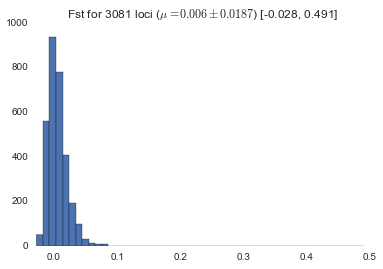

In [788]:
plt.hist(loci_fst, bins=50)
plt.xlim(-.03, .5)
plt.title("Fst for %d loci ($\mu=%.3f \pm %.4f$) [%.3f, %.3f]" % (len(loci_fst),
                                                                  np.mean(loci_fst),
                                                                  np.std(loci_fst),
                                                                  np.min(loci_fst),
                                                                  np.max(loci_fst)))
plt.show()

In [789]:
loc_hierf.shape

(248, 3089)

In [793]:
def get_phenotype(row):
    return np.max(pheno[(pheno.Longitude==row.long) & (pheno.Latitude==row.lat)])
trait = loc_hierf.apply(get_phenotype, axis=1)

In [795]:
trait_loc_hierf = trait.join(loc_hierf, how="inner")

In [822]:
trait_complete = trait_loc_hierf.drop(trait_loc_hierf[np.isnan(trait_loc_hierf[trait_name])].index)

In [798]:
trait_complete[:5]

,Longitude,Latitude,Clone_id,sucrose,county,state,lat,long,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,...,UMN-835-02-99,UMN-887-02-208,UMN-896-01-238,UMN-897-01-82,UMN-915-01-50,UMN-927-01-395,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig,county_state,usable
12,-79.30539,33.36318,90C,5.718644,GEORGETOWN,SC,33.36318,-79.30539,4,NA,12,NA,NA,11,12,11,11,12,12,12,11,11,11,11,11,11,12,12,11,11,11,12,11,11,11,12,12,12,NA,11,11,NA,12,11,12,11,12,11,11,11,...,NA,12,NA,11,11,11,11,11,11,12,12,11,12,12,NA,12,12,11,12,NA,12,12,12,11,NA,11,NA,11,12,11,NA,11,11,11,11,12,NA,12,11,NA,11,12,11,11,11,NA,11,NA,GEORGETOWN_SC,True
13,-77.05205,35.55349,382A,5.591146,BEAUFORT,NC,35.55349,-77.05205,0,11,NA,12,12,11,22,11,11,11,12,11,11,11,22,11,12,12,11,11,11,11,12,12,11,11,12,12,11,11,12,11,11,11,11,11,12,11,12,11,11,11,...,11,12,11,11,11,11,11,11,11,12,11,11,11,11,11,11,11,11,12,12,11,11,11,11,12,11,12,11,11,12,11,12,11,11,12,11,11,11,11,11,11,12,11,11,22,11,12,11,BEAUFORT_NC,True
15,-77.06917,35.10917,383C,5.492224,CRAVEN,NC,35.10917,-77.06917,3,12,12,12,12,11,12,11,11,11,22,12,12,11,22,11,11,12,11,11,11,11,11,12,12,11,11,11,11,12,11,11,11,NA,12,11,11,11,11,11,11,11,...,12,12,11,11,11,11,11,11,11,11,11,12,12,11,11,11,12,11,11,11,11,11,12,11,11,11,12,11,12,11,12,11,22,11,11,11,11,11,11,12,11,12,12,11,11,12,11,11,CRAVEN_NC,True
18,-77.05205,35.55349,382A,5.591146,BEAUFORT,NC,35.55349,-77.05205,0,11,11,22,11,12,12,11,11,11,12,11,11,11,11,12,12,12,11,11,11,11,12,11,11,11,12,11,12,12,11,11,12,12,12,12,12,11,12,11,11,11,...,11,11,11,11,11,11,11,12,11,12,12,11,12,11,11,11,NA,11,11,12,11,11,22,11,12,11,11,11,22,11,NA,11,11,11,11,11,11,11,12,11,11,NA,11,11,12,11,11,11,BEAUFORT_NC,True
20,-77.06917,35.10917,383C,5.492224,CRAVEN,NC,35.10917,-77.06917,3,11,12,12,22,11,22,11,12,11,11,11,11,11,12,11,11,11,12,11,11,11,12,22,12,11,11,12,11,12,12,11,11,22,11,12,11,11,11,11,11,11,...,11,12,11,11,11,11,11,12,11,12,12,11,11,11,22,11,22,11,11,22,12,12,22,11,11,11,11,11,11,NA,12,11,11,11,11,12,11,12,11,12,11,11,11,12,11,12,22,11,CRAVEN_NC,True


In [871]:
def convert_to_snpassoc(col):
    if "-" in col.name:
        freqs = af[col.name]
        trans = {11: "%s/%s" % (freqs["A"], freqs["A"]),
                12: "%s/%s" % (freqs["A"], freqs["a"]),
                22: "%s/%s" % (freqs["a"], freqs["a"]),
                "NA":"NA"}
        return col.apply(lambda x: trans[x])
    return col
trait_snpassoc = trait_complete.apply(convert_to_snpassoc)

In [800]:
pca_cov = x_drop.ix[:,0:14]

In [801]:
trait_snpassoc_pca = trait_snpassoc.join(pca_cov, how="inner")

In [802]:
trait_snpassoc_pca = trait_snpassoc_pca.drop(['county_state',
                                                   'usable',
                                                   'Longitude',
                                                   'Latitude',
                                                   'Clone_id',
                                                   'county',
                                                   'state',
                                                   'lat',
                                                   'long',
                                                   'countyid'], axis=1)

In [803]:
trait_snpassoc_pca[0:5]

,sucrose,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,0-1055-01-350,0-10559-01-302,0-10574-01-227,0-10591-01-289,0-10602-01-408,0-10611-01-386,0-10612-02-301,0-10618-01-108,...,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
12,5.718644,NA,C/A,NA,NA,G/G,G/A,A/A,G/G,A/C,A/G,A/C,A/A,A/A,A/A,A/A,G/G,G/G,C/A,A/T,A/A,G/G,A/A,A/C,G/G,A/A,G/G,G/C,T/A,A/G,NA,A/A,G/G,NA,G/C,A/A,T/A,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,NA,C/C,G/A,A/A,...,A/T,C/A,NA,A/G,G/A,G/G,A/C,NA,C/A,A/G,G/C,G/G,NA,A/A,NA,C/C,G/A,G/G,NA,C/C,A/A,A/A,T/T,C/G,NA,G/A,A/A,NA,A/A,C/A,G/G,A/A,C/C,NA,C/C,NA,2.329722,1.624366,0.335046,-0.417052,-1.013743,-0.138149,1.068138,0.402887,-0.010373,0.559439,2.445590,0.335334,-0.047097,-1.344021
13,5.591146,A/A,NA,C/G,G/A,G/G,A/A,A/A,G/G,A/A,A/G,A/A,A/A,A/A,C/C,A/A,G/A,G/A,C/C,A/A,A/A,G/G,A/T,A/C,G/G,A/A,G/A,G/C,T/T,A/A,A/C,A/A,G/G,A/A,G/G,A/A,T/A,C/C,A/C,A/A,G/G,A/A,G/G,A/A,A/A,A/A,A/A,C/C,A/A,A/A,...,A/A,C/C,A/A,A/A,G/G,G/G,A/C,G/C,C/C,A/A,G/G,G/G,A/G,A/A,A/G,C/C,G/G,G/A,A/A,C/A,A/A,A/A,T/A,C/C,C/C,G/G,A/A,G/G,A/A,C/A,G/G,A/A,A/A,G/G,C/A,G/G,-2.708652,3.668354,4.708462,0.815316,5.354841,5.688271,6.544227,1.869980,-0.408042,2.274323,0.627999,-6.249547,-8.086907,8.983447
15,5.492224,A/G,C/A,C/G,G/A,G/G,G/A,A/A,G/G,A/A,G/G,A/C,A/T,A/A,C/C,A/A,G/G,G/A,C/C,A/A,A/A,G/G,A/A,A/C,G/A,A/A,G/G,G/G,T/T,A/G,A/A,A/A,G/G,NA,G/C,A/A,T/T,C/C,A/A,A/A,G/G,A/A,G/G,A/A,A/A,A/A,NA,C/C,A/A,A/A,...,A/T,C/C,A/A,A/A,G/A,G/G,A/A,G/G,C/C,A/A,G/C,G/G,A/A,A/A,A/G,C/C,G/A,G/G,A/G,C/C,T/T,A/A,T/T,C/C,C/C,G/G,A/A,G/C,A/A,C/A,G/A,A/A,C/C,G/A,C/C,G/G,-3.152409,2.664518,2.302811,-0.078610,0.237071,-3.257392,-2.636748,3.809404,-0.443443,7.257342,-0.466697,1.824831,-0.198020,-1.268526
18,5.591146,A/A,C/C,G/G,G/G,G/A,G/A,A/A,G/G,A/A,A/G,A/A,A/A,A/A,A/A,A/G,G/A,G/A,C/C,A/A,A/A,G/G,A/T,A/A,G/G,A/A,G/A,G/G,T/A,A/G,A/A,A/A,G/A,A/T,G/C,A/G,T/A,C/C,A/C,A/A,G/G,A/A,G/G,A/G,A/A,A/A,A/G,C/C,G/A,A/A,...,A/T,C/C,A/A,A/A,NA,G/G,A/A,G/C,C/C,A/A,C/C,G/G,A/G,A/A,A/A,C/C,A/A,G/G,NA,C/C,A/A,A/A,T/T,C/C,C/C,G/G,A/G,G/G,A/A,NA,G/G,A/A,C/A,G/G,C/C,G/G,-3.806482,2.723616,-5.248239,-2.665990,4.428649,-2.327034,-2.104905,5.450938,-3.403810,-0.727319,4.328464,-1.099518,0.683061,0.534313
20,5.492224,A/A,C/A,C/G,A/A,G/G,A/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A,A/C,A/A,G/G,G/G,C/A,A/A,A/A,G/G,A/T,C/C,G/A,A/A,G/G,G/C,T/T,A/G,A/C,A/A,G/G,T/T,G/G,A/G,T/T,C/C,A/A,A/A,G/G,A/A,G/G,A/A,A/G,A/A,A/G,C/C,G/G,A/G,...,A/A,C/C,C/C,A/A,A/A,G/G,A/A,C/C,C/A,A/G,C/C,G/G,A/A,A/A,A/A,C/C,G/G,NA,A/G,C/C,A/A,A/A,T/T,C/G,C/C,G/A,A/A,G/C,A/A,C/C,G/G,A/G,C/C,G/A,A/A,G/G,-3.674586,5.344520,-3.761804,-0.478603,1.534471,-8.286508,0.466899,-0.5671

In [806]:
trait_snpassoc_pca.to_csv("snpassoc.txt",
                             header=True,
                             index=True,
                             sep="\t")

In [807]:
def write_snpassoc_file(df, input_file, num_pca_axes):
    pheno = df.columns[0:1]
    out_files = []
    for p in pheno:
        with open("snpassoc_%s.R" % p.lower(), "w") as o:
            print "writing %s" % o.name
            out_files.append(o.name)
            text = '''
library(SNPassoc)

d = read.table('%s', sep="\\t", row.names=1, header=T)

#subtract b/c those are the PCA axes
snp_cols = 2:(ncol(d)-%d)
snp_data = setupSNP(d, colSNPs=snp_cols, sep="/")
pca_cols = (ncol(d)-%d):ncol(d)
pca_data = d[,pca_cols]

wg = WGassociation(%s~1+pca_data$PC1+pca_data$PC2+pca_data$PC3+pca_data$PC4+
pca_data$PC5+pca_data$PC6+pca_data$PC7+pca_data$PC8+pca_data$PC9+pca_data$PC10+
+pca_data$PC11+pca_data$PC12+pca_data$PC13+pca_data$PC14, 
data=snp_data, 
model="co", 
genotypingRate=5)

saveRDS(wg, "wg_%s_co.rds")
stats = WGstats(wg)
saveRDS(stats, "wgstats_%s.rds")
''' % (input_file, 
       num_pca_axes,
       num_pca_axes-1,
       p, 
       p.lower(), 
       p.lower())
        
            o.write(text)
    
    return out_files

In [808]:
write_snpassoc_file(trait_snpassoc_pca, "snpassoc.txt", 14)

writing snpassoc_sucrose.R


[u'snpassoc_sucrose.R']

##Run this in R
```R
source("snpassoc_<trait>.R")
```

In [825]:
%%R
wg_trait_co.rds = readRDS('wg_sucrose_co.rds')
wgstats_trait.rds = readRDS('wgstats_sucrose.rds')

In [826]:
wgstats_trait = r['wgstats_trait.rds']
wgstats_trait_labels = r('labels(wg_trait_co.rds)')

In [827]:
wgstats = {trait_name:[wgstats_pinitol, wgstats_pinitol_labels.rx2(1)]}
for key, datalist in wgstats.items():
    print "converting %s" % key
    wgstats[key] = [com.convert_robj(x) for x in datalist]

converting sucrose


In [815]:
def get_alleles(data):
    a = set()
    for x in data.index:
        for elem in x.split("/"):
            a.add(elem)
    return list(a)  

def get_allele_freqs_wg(data, AA, Aa, aa):
    total = np.sum(data['n'])*2
    A = data.ix[AA, "n"]*2 + data.ix[Aa, "n"]
    a = data.ix[aa, "n"]*2 + data.ix[Aa, "n"]
    return A/total, a/total

def get_genotypes(data, alleles):
    homos = ["%s/%s" % (x,x) for x in alleles]
    Aa = "%s/%s" % (alleles[0], alleles[1])
    if Aa not in data.index:
        Aa = Aa[::-1] #reverse it
    AA, aa = homos
    if data.ix[AA, "n"] < data.ix[aa, "n"]:
        AA, aa = homos[::-1] #reverse it so that major is first
    return AA, Aa, aa

def get_genotypic_values(data, alleles):
    AA, Aa, aa = get_genotypes(data, alleles)
    G_AA = float(data.ix[AA, 'me'])
    G_aa = float(data.ix[aa, 'me'])
    additive = (G_AA-G_aa)/2
    G_Aa = float(data.ix[Aa, 'me'])
    dominance = G_Aa - ((G_AA+G_aa)/2)
    return additive, dominance, AA, Aa, aa
    
def get_alpha(data):
    alleles = get_alleles(data)
    additive, dominance, AA, Aa, aa = get_genotypic_values(data, alleles)
    p, q = get_allele_freqs_wg(data, AA, Aa, aa)
    alpha = additive + (dominance*(q-p))
    return alpha, AA, aa, p, q

In [828]:
alpha_vals = {}
for p in wgstats:
    print "running %s" % p
    df = pd.DataFrame(index=["alpha", "p-value", "AA", "aa", "p", "q"])
    alpha_vals[p] = df
    d = wgstats[p][0]
    labels = wgstats[p][1]
    for i, locus in enumerate(d):
        try:
            data = pd.DataFrame(d[locus])
            snp = labels[i]
            genotypes = [g for g in data.index if "/" in g]
            data = data.ix[genotypes,:]
            pvalue = data['p-value'].dropna()[0]
            if len(genotypes) == 3:
                alpha, AA, aa, p, q = get_alpha(data)
                df[snp] = [alpha, pvalue, AA, aa, p, q]
        except Exception as e: 
            pass

running sucrose


In [829]:
alpha_vals[trait_name]

,X0.10037.01.257,X0.10040.02.394,X0.10044.01.392,X0.10048.01.60,X0.10051.02.166,X0.10112.01.169,X0.10113.01.119,X0.10116.01.165,X0.10151.01.86,X0.10162.01.255,X0.1022.02.173,X0.10240.01.410,X0.10262.01.558,X0.10266.01.426,X0.10267.01.42,X0.10278.01.62,X0.10303.01.262,X0.1034.01.290,X0.10340.02.47,X0.10360.01.348,X0.10399.01.414,X0.10401.01.126,X0.10429.01.408,X0.10446.01.240,X0.10449.01.220,X0.10453.01.397,X0.10501.01.174,X0.10503.01.576,X0.10515.01.370,X0.10559.01.302,X0.10574.01.227,X0.10591.01.289,X0.10602.01.408,X0.10612.02.301,X0.10618.01.108,X0.10631.02.260,X0.10635.01.490,X0.10642.01.254,X0.10651.02.408,X0.10663.01.213,X0.10667.02.53,X0.10693.01.146,X0.1071.01.115,X0.10712.02.123,X0.10719.01.95,X0.10729.02.220,X0.10754.01.369,X0.10830.01.358,X0.10832.01.332,X0.10838.01.67,...,UMN.7054.02.201,UMN.7192.01.174,UMN.7253.01.407,UMN.7260.01.146,UMN.7324.01.393,UMN.737.01.96,UMN.738.01.522,UMN.7418.01.90,UMN.7457.02.357,UMN.755.01.150,UMN.7550.02.174,UMN.777.01.425,UMN.819.01.396,UMN.822.01.99,UMN.828.01.73,UMN.887.02.208,UMN.897.01.82,UMN.915.01.50,UMN.927.01.395,UMN.962.01.582,UMN.967.01.246,UMN.979.01.71,UMN.991.01.295,UMN.CL100Contig1.06.131,UMN.CL112Contig1.03.395,UMN.CL116Contig1.02.260,UMN.CL124Contig1.02.336,UMN.CL168Contig1.01.337,UMN.CL176Contig1.09.203,UMN.CL189Contig1.04.106,UMN.CL194Contig1.04.130,UMN.CL198Contig1.03.66,UMN.CL20Contig1.02.247,UMN.CL210Contig1.03.48,UMN.CL212Contig1.01.184,UMN.CL21Contig1.03.384,UMN.CL228Contig1.03.181,UMN.CL22Contig1.02.132,UMN.CL239Contig1.03.104,UMN.CL298Contig1.04.378,UMN.CL307Contig1.04.143,UMN.CL326Contig1.05.421,UMN.CL339Contig1.05.39,UMN.CL34Contig1.03.89,UMN.CL362Contig1.07.133,UMN.CL363Contig1.01.233,UMN.CL379Contig1.12.117,UMN.CL424Contig1.03.94,UMN.CL54Contig1.07.88,UMN.CL97Contig
alpha,-0.02242873,-0.01242474,-0.03174162,0.02739609,0.01282848,-0.04594141,-0.02055713,0.03214681,0.003063725,-0.01244078,0.00454141,0.02128233,0.006197637,-0.01863274,-0.02796865,0.02948235,0.03472347,-0.0003746642,-0.02038727,-0.007524073,0.01350078,0.003086811,0.003625998,0.0105063,0.0001867837,-0.02395058,0.01160976,0.0330563,0.01067139,0.01499301,0.02096711,0.01589056,0.006316381,0.03730088,-0.004912908,0.01669203,0.00799074,-0.00280721,-0.03199792,0.02226177,0.0241517,0.01381196,-0.006996957,-0.0002654333,0.007836201,0.01759666,0.02840896,0.02830772,-0.02154388,-0.0100219,...,-0.001599832,0.03507569,-0.1203989,-0.008834418,-0.01867305,-0.002040035,0.0001208264,0.01691477,0.01920831,-0.006418432,-0.02546227,0.005592761,0.0363853,0.01236809,0.01241774,-0.02303801,-0.01182202,-0.008278475,0.02058268,0.02116794,-0.05383307,-0.0257271,-0.09133529,-0.01186487,-0.01051831,0.03070133,0.01773831,-0.01621884,0.01644767,0.004869399,-0.03413405,-0.04725976,0.02511661,0.01968344,0.01299197,0.09852857,0.04986278,-0.0145824,-0.02599735,0.03723797,-0.01269703,-0.01051948,-0.001339832,1.652034e-05,0.001041517,0.02344532,-0.0443946,0.008185855,-0.00443632,0.01427722
p-value,0.6550102,0.9239838,0.3461019,0.2804087,0.661529,0.01155124,0.7632138,0.6695773,0.3923862,0.5409907,0.189134,0.9395222,0.3639468,0.285955,0.1675936,0.9385911,0.1552021,0.9972047,0.0642215,0.4830609,0.4633891,0.1438243,0.4022345,0.6795116,0.8950497,0.321126,0.9691998,0.2026559,0.71519,0.2600842,0.5564203,0.5871749,0.9365629,0.08052249,0.545481,0.7299064,0.6474543,0.9029086,0.7740082,0.8532371,0.3870879,0.09660235,0.9885646,0.9042312,0.4123484,0.2586416,0.023248,0.3984546,0.97241,0.255643,...,0.5280592,0.3121243,4.885537e-06,0.7302761,0.2315567,0.5533957,0.4793496,0.5446552,0.8606344,0.4495107,0.9080677,0.2676354,0.289186,0.8878928,0.3874565,0.2334762,0.8776579,0.4710038,0.6347658,0.2135902,0.08865926,0.917146,0.01202992,0.8183105,0.659909,0.5692025,0.8120885,0.8781291,0.767883,0.9520744,0.232645,0.6097873,0.01659349,0.104769,0.4779733,2.460902e-05,0.02721961,0.7906327,0.5468871,0.2753531,0.02562822,0.1322363,0.1347543,0.8500733,0.7127261,0.3735875,0.1139252,0.2941047,0.7376697,0.3922735
AA,G/G,T/T,G/G,A/A,A/A,A/A,C/C,G/G,T/T,C/C,A/A,G/

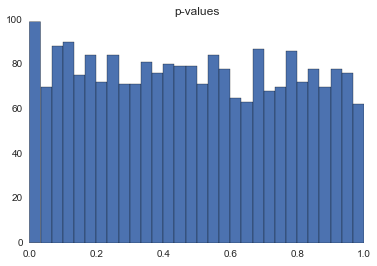

In [830]:
plt.hist(alpha_vals[trait_name].ix['p-value',:], bins=30)
plt.title("p-values")
plt.show()

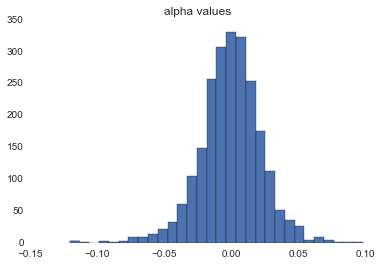

In [831]:
plt.hist(alpha_vals[trait_name].ix['alpha',:], bins=30)
plt.title("alpha values")
plt.show()

In [832]:
trait_snpassoc_pca_county = pd.concat([loc_hierf.countyid, trait_snpassoc_pca], axis=1)
trait_snpassoc_pca_county = trait_snpassoc_pca_county.drop(trait_snpassoc_pca_county[np.isnan(trait_snpassoc_pca_county[trait_name])].index)
trait_snpassoc_pca_county[0:5]
snpassoc_af = trait_snpassoc_pca_county.ix[:,2:-14].apply(get_allele_freqs)

In [833]:
pop_allele_freqs = {}
for pop,data in trait_snpassoc_pca_county.groupby("countyid"):
    print "getting allele freqs for pop % d" % pop
    pop_allele_freqs[pop] = data.ix[:,2:-14].apply(get_allele_freqs)

In [834]:
def write_gwas_data_file(df, pheno, outdir):
    out = "%s_gwas_data_file.txt" % pheno
    out = os.path.join(outdir, out)
    df = df.sort_index()
    df[['A1', 'A2', 'EFF', 'FRQ']].to_csv(out,
                                          header=True, 
                                          index=True,
                                          sep="\t")
    print out
    return out

def write_freqs_file(df, pheno, pop_freqs, outdir):
    out = "%s_freqs_file.txt" % pheno
    out = os.path.join(outdir, out)
    print out
    with open(out, "w") as o:
        o.write("SNP\tCLST\tA1\tA2\tFRQ\n")
        for pop, data in pop_freqs.items():
            m = data.T.merge(df, how="inner", left_index=True, right_index=True)
            m['population'] = pop
            m.index.name = 'SNP'
            m = m.sort_index()
            o.write(m[['population','A1','A2','p']].to_csv(header=False, 
                                                             index=True,
                                                             sep="\t"))
def write_match_pop_file(df, pheno, pop_freqs, pop, outdir):
    out = "%s_match_pop_file.txt" % pheno
    out = os.path.join(outdir, out)
    print out
    with open(out, "w") as o:
        o.write("SNP\tCLST\tA1\tA2\tFRQ\n")
        for key, data in pop_freqs.items():
            if key == pop:
                m = data.T.merge(df, how="inner", left_index=True, right_index=True)
                m['population'] = pop
                m.index.name = 'SNP'
                m = m.sort_index()
                o.write(m[['population','A1','A2','p']].to_csv(header=False, 
                                                                 index=True,
                                                                 sep="\t"))
                break
                
def write_full_dataset_file(df, pheno, pop_freqs, outdir):
    out = "%s_full_dataset_file.txt" % pheno
    out = os.path.join(outdir, out)
    print out
    with open(out, "w") as o:
        o.write("SNP\tCLST\tA1\tA2\tFRQ\n")
        for pop, data in pop_freqs.items():
            m = data.T.merge(df, how="inner", left_index=True, right_index=True)
            m['population'] = pop
            m.index.name = 'SNP'
            m = m.sort_index()
            o.write(m[['population','A1','A2','p']].to_csv(header=False, 
                                                             index=True,
                                                             sep="\t"))   
def write_env_var_data_file(pheno, pop_freqs, outdir):
    out = "%s_env_var_data_file.txt" % pheno
    out = os.path.join(outdir, out)
    print out
    with open(out, "w") as o:
        o.write("CLST\tENV\tREG\n")
        pop_id = 0
        for pop in pop_freqs:
            pop_id += 1
            o.write("%s\t%f\t%d\n" % (pop, np.random.randn(), pop_id))

In [839]:
cd /Users/chris/Dropbox/Documents/science/congenomics_2015/slides

/Users/chris/Dropbox/Documents/science/congenomics_2015/slides


In [840]:
outdir = "/Users/chris/Dropbox/Documents/science/congenomics_2015/slides/squat"
if not os.path.exists(outdir):
    os.mkdir(outdir)

for p in alpha_vals:
    full = alpha_vals[p].T
    full.index = [x.replace(".", "-") for x in full.index]
    full.index = [x[1:] if x.startswith("X") else x for x in full.index]
    full.index.name = "SNP"
    full.AA = full.AA.apply(lambda x: x[0])
    full.aa = full.aa.apply(lambda x: x[0])
    full = full.rename(columns={'alpha':'EFF',
                                'AA':'A1',
                                'aa':'A2',
                                'p': 'FRQ'})
    candidates = full[full['p-value']<0.001]
    write_gwas_data_file(candidates, p, outdir)
    write_freqs_file(candidates, p, pop_allele_freqs, outdir)
    write_match_pop_file(full, p, pop_allele_freqs, 2, outdir)
    write_full_dataset_file(full, p, pop_allele_freqs, outdir)
    write_env_var_data_file(p, pop_allele_freqs, outdir)

/Users/chris/Dropbox/Documents/science/congenomics_2015/slides/squat/sucrose_gwas_data_file.txt
/Users/chris/Dropbox/Documents/science/congenomics_2015/slides/squat/sucrose_freqs_file.txt
/Users/chris/Dropbox/Documents/science/congenomics_2015/slides/squat/sucrose_match_pop_file.txt
/Users/chris/Dropbox/Documents/science/congenomics_2015/slides/squat/sucrose_full_dataset_file.txt
/Users/chris/Dropbox/Documents/science/congenomics_2015/slides/squat/sucrose_env_var_data_file.txt


In [848]:
pwd

u'/Users/chris/Dropbox/Documents/science/congenomics_2015/slides'

In [858]:
squat_dir = "/Users/chris/src/PolygenicAdaptationCode/Scripts/"
def get_squat_vars(pheno):
    d = {"gwas.data.file":"'%s_gwas_data_file.txt'" % pheno,
         "freqs.file":"'%s_freqs_file.txt'" % pheno,
         "env.var.data.files":"list('%s_env_var_data_file.txt')" % pheno,
         "match.pop.file":"'%s_match_pop_file.txt'" % pheno,
         "full.dataset.file":"'%s_full_dataset_file.txt'" % pheno,
         "path":"'%s'" % pheno,
         "match.categories":"c('MAF')",
         "match.bins":"list(seq(0,0.5,0.02), c(2), seq(0,1000,100))",
         "cov.SNPs.per.cycle":5000,
         "cov.cycles":1,
         "null.phenos.per.cycle":1000,
         "null.cycles":1,
         "load.cov.mat":"F",
         "sim.null":"T",
         "check.allele.orientation":"F"}
    return ',\n'.join("%s=%s" % (key,val) for (key,val) in d.items())

def create_squat_run_file(pheno):
    if not os.path.exists("squat"):
        os.mkdir("squat")
    squat_file = os.path.join("squat", "squat_%s.r" % pheno)
    with open(squat_file, "w") as o:
        o.write('system("rm -rf %s")\n'% pheno)
        o.write("source('%s')\n" % os.path.join(squat_dir, "CreateTraitFile.R"))
        o.write("source('%s')\n" % os.path.join(squat_dir, "functions.R"))
        o.write("PolygenicAdaptationFunction(%s)\n" % get_squat_vars(pheno))
    return squat_file

for pheno in alpha_vals:
    squat_file = create_squat_run_file(pheno)
    print squat_file
    !cat $squat_file
    print ""

squat/squat_sucrose.r
system("rm -rf sucrose")
source('/Users/chris/src/PolygenicAdaptationCode/Scripts/CreateTraitFile.R')
source('/Users/chris/src/PolygenicAdaptationCode/Scripts/functions.R')
PolygenicAdaptationFunction(sim.null=T,
cov.SNPs.per.cycle=5000,
null.cycles=1,
match.bins=list(seq(0,0.5,0.02), c(2), seq(0,1000,100)),
load.cov.mat=F,
path='sucrose',
cov.cycles=1,
match.pop.file='sucrose_match_pop_file.txt',
freqs.file='sucrose_freqs_file.txt',
env.var.data.files=list('sucrose_env_var_data_file.txt'),
gwas.data.file='sucrose_gwas_data_file.txt',
full.dataset.file='sucrose_full_dataset_file.txt',
match.categories=c('MAF'),
check.allele.orientation=F,
null.phenos.per.cycle=1000)



In [859]:
pwd

u'/Users/chris/Dropbox/Documents/science/congenomics_2015/slides'

In [ ]:
def run_squat(p):
    print "running %s" % p
    output = "squat/%s" % p
    if os.path.exists(output):
        !rm -rf {output}
    r('source("squat/squat_%s.r")' % p)
run_squat(trait_name)

In [868]:
rfiles = !find . | grep Robj | grep Output | grep {trait_name}
bc = {}
for f in rfiles:
    d = f.split("/")
    if not d[1] in bc:
        bc[d[1]] = []
    bc[d[1]].append(f)
bc

{'squat': ['./squat/sucrose/Output/asymptotic.pVals.Robj',
  './squat/sucrose/Output/genetic.values.Robj',
  './squat/sucrose/Output/nullStats.Robj',
  './squat/sucrose/Output/pVals.Robj',
  './squat/sucrose/Output/theStats.Robj']}

In [870]:
for pheno in bc:
    print pheno
    for obj in bc[pheno]:
        r('load("%s")' % obj)
    print r("the.stats")
    print("------------------")
    print r("p.vals")

squat
$Qx
[1] 4.835994

$Fst.comp
[1] 10.86958

$LD.component
[1] -6.033586

$betas
$betas[[1]]
[1] -0.0003726624


$pearson.rs
$pearson.rs[[1]]
[1] -0.0561532


$spearman.rhos
$spearman.rhos[[1]]
           [,1]
[1,] -0.1272727


$reg.Z
           Env File 1
Region 1   0.18790013
Region 2   0.18222569
Region 3  -0.21178420
Region 4   1.27101141
Region 5  -1.20578611
Region 6  -0.57168700
Region 7  -0.26047855
Region 8  -0.67658462
Region 9   0.54711595
Region 10 -0.25180267
Region 11  0.68301102
Region 12 -0.09730845

$ind.Z
          0           1           2           3           4           6 
 0.18790013  0.18222569 -0.21178420  1.27101141 -1.20578611 -0.57168700 
          7           8           9          10          11          12 
-0.26047855 -0.67658462  0.54711595 -0.25180267  0.68301102 -0.09730845 


------------------
$Qx
[1] 0.873

$Fst.comp
[1] 0.262

$LD.comp
[1] 0.98

$betas
[1] 0.906

$pearson.rs
[1] 0.851

$spearman.rhos
[1] 0.67

$reg.Z
          Env File 1
Region

##bayenv

In [890]:
snp_names = [x for x in trait_snpassoc.columns if "-" in x]
popids = sorted(trait_snpassoc.countyid.unique())

In [911]:
with open("bayenv.txt", "w") as o:
    with open("bayenv_names.txt", "w") as n:
        for name in snp_names:
            P = []
            Q = []
            for popid in popids:
                P.append(pop_allele_freqs[popid].ix["P",name])
                Q.append(pop_allele_freqs[popid].ix["Q",name])
            if sum(Q) > 0: #exclude monomorphic loci
                n.write("%s\n" % name)
                P = [str(x) for x in P]
                Q = [str(x) for x in Q]
                o.write("%s\t\n" % "\t".join(Q))
                o.write("%s\t\n" % "\t".join(P))

In [905]:
!head bayenv.txt

45	17	20	28	14	15	17	19	15	3	5	89		
23	5	6	14	4	5	5	7	7	3	3	37		
33	9	14	23	15	12	11	14	14	4	6	65		
29	9	12	21	5	8	11	12	8	2	2	61		
28	12	15	23	9	12	11	16	11	5	5	63		
28	10	9	17	9	4	11	10	9	1	3	59		
45	13	18	21	13	16	16	17	17	3	7	94		
23	7	8	21	5	4	6	9	5	3	1	32		
64	17	25	41	19	17	21	25	20	6	7	121		
2	3	1	3	1	3	1	1	2	0	1	5		


In [912]:
!head bayenv_names.txt

0-10037-01-257
0-10040-02-394
0-10044-01-392
0-10048-01-60
0-10051-02-166
0-10054-01-402
0-10067-03-111
0-10079-02-168
0-10112-01-169
0-10113-01-119


In [909]:
snp_names[-1]

u'UMN-CL97Contig'

In [920]:
data_ai['county_state'] = data_ai.apply(lambda row: "%s_%s" % (row.County, row.State), axis=1)

In [948]:
data_ai[['AI_Q1','AI_Q2','AI_Q3','AI_Q4']]=data_ai[['AI_Q1','AI_Q2','AI_Q3','AI_Q4']].apply(preprocessing.scale)

In [952]:
trait_snpassoc_ai = trait_snpassoc.merge(data_ai, on='county_state')

In [953]:
trait_snpassoc_ai

,Longitude,Latitude,Clone_id,sucrose,county,state,lat,long,countyid,0-10037-01-257,0-10040-02-394,0-10044-01-392,0-10048-01-60,0-10051-02-166,0-10054-01-402,0-10067-03-111,0-10079-02-168,0-10112-01-169,0-10113-01-119,0-10116-01-165,0-10151-01-86,0-10162-01-255,0-10207-01-280,0-10210-01-41,0-10219-01-433,0-1022-02-173,0-10240-01-410,0-10262-01-558,0-10266-01-426,0-10267-01-42,0-10278-01-62,0-1028-01-225,0-10303-01-262,0-1034-01-290,0-10340-02-47,0-10360-01-348,0-10373-01-711,0-10384-02-274,0-10399-01-414,0-10401-01-126,0-10429-01-408,0-10443-01-350,0-10446-01-240,0-10449-01-220,0-10453-01-397,0-10472-01-146,0-10488-02-86,0-10501-01-174,0-10503-01-576,0-10515-01-370,...,UMN-962-01-582,UMN-967-01-246,UMN-979-01-71,UMN-991-01-295,UMN-CL100Contig1-06-131,UMN-CL112Contig1-03-395,UMN-CL116Contig1-02-260,UMN-CL124Contig1-02-336,UMN-CL137Contig1-06-120,UMN-CL148Contig1-02-219,UMN-CL168Contig1-01-337,UMN-CL16Contig1-04-124,UMN-CL173Contig1-01-165,UMN-CL176Contig1-09-203,UMN-CL181Contig1-02-123,UMN-CL189Contig1-04-106,UMN-CL194Contig1-04-130,UMN-CL198Contig1-03-66,UMN-CL20Contig1-02-247,UMN-CL210Contig1-03-48,UMN-CL212Contig1-01-184,UMN-CL21Contig1-03-384,UMN-CL228Contig1-03-181,UMN-CL22Contig1-02-132,UMN-CL239Contig1-03-104,UMN-CL290Contig1-08-336,UMN-CL298Contig1-04-378,UMN-CL299Contig1-01-46,UMN-CL306Contig1-04-261,UMN-CL307Contig1-04-143,UMN-CL319Contig1-03-131,UMN-CL326Contig1-05-421,UMN-CL339Contig1-05-39,UMN-CL34Contig1-03-89,UMN-CL353Contig1-04-64,UMN-CL362Contig1-07-133,UMN-CL363Contig1-01-233,UMN-CL379Contig1-12-117,UMN-CL424Contig1-03-94,UMN-CL54Contig1-07-88,UMN-CL91Contig1-02-246,UMN-CL97Contig,county_state,usable,County,State,AI_Q1,AI_Q2,AI_Q3,AI_Q4
0,-79.30539,33.36318,90C,5.718644,GEORGETOWN,SC,33.36318,-79.30539,4,NA,C/A,NA,NA,G/G,G/A,A/A,G/G,A/C,A/G,A/C,A/A,A/A,A/A,A/A,G/G,G/G,C/A,A/T,A/A,G/G,A/A,A/C,G/G,A/A,G/G,G/C,T/A,A/G,NA,A/A,G/G,NA,G/C,A/A,T/A,C/C,A/C,A/A,G/G,A/A,...,G/G,G/G,A/A,G/A,C/A,A/A,A/T,C/A,NA,A/G,G/A,G/G,A/C,NA,C/A,A/G,G/C,G/G,NA,A/A,NA,C/C,G/A,G/G,NA,C/C,A/A,A/A,T/T,C/G,NA,G/A,A/A,NA,A/A,C/A,G/G,A/A,C/C,NA,C/C,NA,GEORGETOWN_SC,True,GEORGETOWN,SC,-0.128761,0.129585,2.205360,-0.147114
1,-79.30539,33.36318,90C,5.718644,GEORGETOWN,SC,33.36318,-79.30539,4,A/G,C/C,C/G,G/A,G/G,G/A,A/A,G/G,A/A,A/G,A/A,A/A,A/A,A/A,A/A,G/A,G/A,C/A,A/A,A/A,G/A,A/T,A/C,G/A,A/A,G/G,C/C,T/T,A/G,NA,A/G,G/G,T/T,G/G,A/G,T/A,C/C,C/C,A/A,G/G,A/A,...,G/G,A/A,A/A,G/G,C/C,A/G,A/T,C/C,A/A,A/A,G/G,G/G,A/C,G/G,C/C,A/G,C/C,G/G,A/A,A/G,A/G,C/C,G/A,NA,G/G,C/A,A/A,A/A,T/A,C/C,C/A,G/G,A/A,G/G,A/A,C/A,G/A,A/A,C/A,G/G,C/A,G/G,GEORGETOWN_SC,True,GEORGETOWN,SC,-0.128761,0.129585,2.205360,-0.147114
2,-79.30539,33.36318,90C,5.718644,GEORGETOWN,SC,33.36318,-79.30539,4,G/G,C/C,C/G,G/G,G/A,A/A,A/A,G/G,A/A,A/A,A/A,A/A,A/A,C/C,A/A,G/A,G/A,C/C,A/A,A/A,G/G,A/T,A/C,G/G,A/A,G/G,G/G,T/T,G/G,A/C,A/A,G/G,NA,G/G,G/G,T/T,C/A,A/C,A/A,G/G,A/A,...,G/G,G/G,A/A,G/A,C/C,A/G,A/A,C/C,A/A,A/A,A/A,G/G,A/A,G/G,C/C,A/G,G/C,G/A,G/G,A/A,A/G,C/C,G/A,G/A,A/G,C/C,A/T,A/A,T/T,C/C,C/C,G/G,A/A,G/G,A/A,C/C,G/G,A/A,C/A,G/A,C/C,A/A,GEORGETOWN_SC,True,GEORGETOWN,SC,-0.128761,0.129585,2.205360,-0.147114
3,-79.30539,33.36318,90C,5.718644,GEORGETOWN,SC,33.36318,-79.30539,4,A/A,C/C,C/G,G/G,G/G,G/A,A/A,G/G,A/A,A/A,A/A,A/A,A/A,A/C,A/A,G/G,G/A,C/C,A/A,A/A,G/G,A/A,A/C,G/G,A/A,G/G,G/C,T/T,A/G,A/A,A/A,G/G,A/T,G/G,A/A,T/A,C/C,A/A,A/A,G/G,A/A,...,G/G,NA,A/A,G/A,C/C,A/A,A/A,C/A,C/C,A/A,G/G,G/G,A/A,G/G,C/C,A/G,G/C,G/G,A/A,A/A,G/G,C/C,A/A,G/A,A/A,C/C,A/A,A/A,T/A,C/C,C/C,G/G,A/A,G/C,A/A,C/C,G/A,A/A,C/C,G/G,C/C,G/A,GEORGETOWN_SC,True,GEORGETOWN,SC,-0.128761,0.129585,2.205360,-0.147114
4,-79.30539,33.36318,90C,5.718644,GEORGETOWN,SC,33.36318,-79.30539,4,A/A,C/A,G/G,G/A,G/G,G/A,A/A,G/A,A/A,A/A,A/A,A/A,A/A,A/A,A/A,G/A,G/G,C/C,A/A,A/A,G/A,A/A,A/A,G/A,A/A,G/G,G/G,T/A,A/A,A/C,A/A,G/G,A/T,G/G,A/G,T/A,C/C,A/C,A/A,G/G,A/A,...,G/G,G/G,A/A,G/G,C/C,A/A,A/A,C/A,A/C,A/A,A/A,G/G,A/A,G/G,C/C,A/A,G/C,G/G,A/G,A/A,A/A,C/C,G/G,G/G,A/A,C/C,A/T,A/A,T/A,C/C,C/C,G/G,A/G,G/C,A/A,C/C,G/G,A/A,C/C,G/G,C/C,G/G,GEORGETOWN_SC,True,GEORGETOW